Overview

Welcome to my analysis of the data job market, focusing on data analyst roles. This project was created out of a desire to navigate and understand the job market more effectively. It delves into the top-paying and in-demand skills to help find optimal job opportunities for data analysts.

The data sourced from Luke Barousse's Python Course which provides a foundation for my analysis, containing detailed information on job titles, salaries, locations, and essential skills. Through a series of Python scripts, I explore key questions such as the most demanded skills, salary trends, and the intersection of demand and salary in data analytics.

In [35]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

In [2]:
pip install datasets

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: xxhash in c:\users\tati\anaconda3\lib\site-packages (from datasets) (3.4.1)



In [3]:

from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

In [4]:
# DATA EXPLORATION PHASE:
#examine first few rows of data
df.head()

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
0,Senior Data Engineer,Senior Clinical Data Engineer / Principal Clin...,"Watertown, CT",via Work Nearby,Full-time,False,"Texas, United States",2023-06-16 13:44:15,False,False,United States,None,NaN,NaN,Boehringer Ingelheim,None,None
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"['r', 'python', 'sql', 'nosql', 'power bi', 't...","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"['python', 'sql', 'c#', 'azure', 'airflow', 'd...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"['python', 'c++', 'java', 'matlab', 'aws', 'te...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"['bash', 'python', 'oracle', 'aws', 'ansible',...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."


In [5]:
df.tail()  # Last 5 rows


,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
785736,Software Engineer,DevOps Engineer,Singapura,melalui Trabajo.org,Pekerjaan tetap,False,Singapore,2023-03-13 06:16:16,False,False,Singapore,None,NaN,NaN,CAREERSTAR INTERNATIONAL PTE. LTD.,"['bash', 'python', 'perl', 'linux', 'unix', 'k...","{'os': ['linux', 'unix'], 'other': ['kubernete..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"['sas', 'sas', 'sql', 'excel']","{'analyst_tools': ['sas', 'excel'], 'programmi..."
785738,Business Analyst,Commercial Analyst - Start Now,Malaysia,melalui Ricebowl,Pekerjaan tetap,False,Malaysia,2023-03-12 06:32:36,False,False,Malaysia,None,NaN,NaN,Lendlease Corporation,"['powerpoint', 'excel']","{'analyst_tools': ['powerpoint', 'excel']}"
785739,Data Engineer,"Principal Associate, Data Engineer (Remote-Eli...","Newark, New Jersey, Amerika Serikat",melalui Recruit.net,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:15,False,False,Sudan,None,NaN,NaN,Capital One,"['python', 'go', 'nosql', 'sql', 'mongo', 'she...","{'cloud': ['aws', 'snowflake', 'azure', 'redsh..."
785740,Software Engineer,AWS System Analyst,India,melalui Trigyn,Pekerjaan tetap,False,India,2023-03-13 06:16:31,False,False,India,None,NaN,NaN,Trigyn,"['aws', 'flow']","{'cloud': ['aws'], 'other': ['flow']}"


In [6]:
df.shape   # Number of rows and columns
# 785741 rows and 17 columns

(785741, 17)

In [7]:
df.info()  # Summary of the DataFrame


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   job_title_short        785741 non-null  object 
 1   job_title              785740 non-null  object 
 2   job_location           784696 non-null  object 
 3   job_via                785733 non-null  object 
 4   job_schedule_type      773074 non-null  object 
 5   job_work_from_home     785741 non-null  bool   
 6   search_location        785741 non-null  object 
 7   job_posted_date        785741 non-null  object 
 8   job_no_degree_mention  785741 non-null  bool   
 9   job_health_insurance   785741 non-null  bool   
 10  job_country            785692 non-null  object 
 11  salary_rate            33067 non-null   object 
 12  salary_year_avg        22003 non-null   float64
 13  salary_hour_avg        10662 non-null   float64
 14  company_name           785727 non-nu

In [8]:
df.columns # List of columns

Index(['job_title_short', 'job_title', 'job_location', 'job_via',
       'job_schedule_type', 'job_work_from_home', 'search_location',
       'job_posted_date', 'job_no_degree_mention', 'job_health_insurance',
       'job_country', 'salary_rate', 'salary_year_avg', 'salary_hour_avg',
       'company_name', 'job_skills', 'job_type_skills'],
      dtype='object')

In [9]:
# explore statistics for numerical variables, Null VALUES, UNIQUE,most frequent value
df.describe(include='all')

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
count,785741,785740,784696,785733,773074,785741,785741,785741,785741,785741,785692,33067,22003.000000,10662.000000,785727,668704,668704
unique,10,234673,17217,7903,47,2,173,607192,2,2,160,5,NaN,NaN,139983,177562,177562
top,Data Analyst,Data Engineer,Anywhere,via LinkedIn,Full-time,False,India,2023-12-08 07:24:37,False,False,United States,year,NaN,NaN,Emprego,['excel'],{'analyst_tools': ['excel']}
freq,196075,53908,69552,186679,701727,716189,51088,10,544965,699244,206292,22004,NaN,NaN,6664,13238,13238
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,123286.274072,47.016598,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48312.449482,21.890738,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000,8.000000,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90000.000000,27.500000,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,115000.000000,45.980000,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,150000.000000,61.159996,NaN,NaN,NaN


In [10]:
#checking for any NULL values
df.isnull().sum()

job_title_short               0
job_title                     1
job_location               1045
job_via                       8
job_schedule_type         12667
job_work_from_home            0
search_location               0
job_posted_date               0
job_no_degree_mention         0
job_health_insurance          0
job_country                  49
salary_rate              752674
salary_year_avg          763738
salary_hour_avg          775079
company_name                 14
job_skills               117037
job_type_skills          117037
dtype: int64

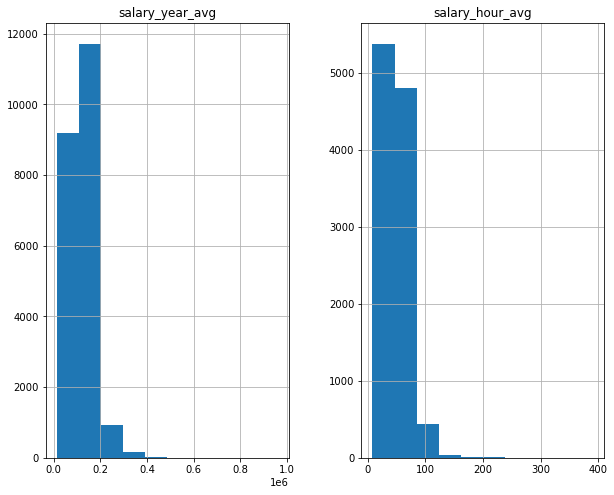

Anywhere                               69552
Singapore                              23415
Paris, France                          12311
Bengaluru, Karnataka, India            11474
London, UK                             10564
                                       ...  
Macon, MO                                  1
County Durham, UK   (+2 others)            1
Bloomfield, IA                             1
Wintzenheim, France                        1
Newark, New Jersey, Amerika Serikat        1
Name: job_location, Length: 17217, dtype: int64

In [25]:
#Visualize the distribution of numerical columns

df.hist(figsize=(10, 8))
plt.show()



In [29]:
job_location_counts= df['job_country'].value_counts()

with pd.option_context('display.max_rows', None):  # This allows to print all rows
    print(job_location_counts)

United States                        206292
India                                 51088
United Kingdom                        40375
France                                39922
Germany                               27694
Spain                                 25100
Singapore                             23696
Sudan                                 21781
Netherlands                           20631
Italy                                 17013
Canada                                16029
Mexico                                15139
Poland                                14793
Portugal                              14508
Australia                             12955
South Africa                          12414
Belgium                               12078
Philippines                           11786
Ireland                               11162
Switzerland                            9924
Austria                                9710
Malaysia                               9219
Argentina                       

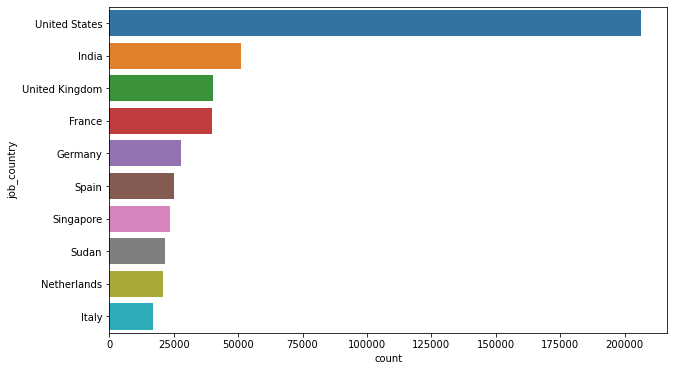

In [21]:
#Categorical Data Exploration
#Check the frequency of unique values in categorical columns:
df['job_location'].value_counts()
df['job_work_from_home'].value_counts()
df['job_country'].value_counts()

# it's a quiet large dataset , lets extract only the top-10 countries with data roles posts:
# Number of top categories to display
top_n = 10
top_categories = df['job_country'].value_counts().nlargest(top_n).index

# Filter the DataFrame to only include the top categories
df_top_n = df[df['job_country'].isin(top_categories)]

# Plot
plt.figure(figsize=(10, 6))
sns.countplot(y='job_country', data=df_top_n, order=top_categories)
plt.show()

#United States has a pretty good job market for data roles. Exciting!

In [28]:
# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

UK JOB MARKET

To focus my analysis on the UK job market, I apply filters to the dataset, creating a subset for only roles based in the United Kingdom.



In [67]:
df_UK = df[df['job_country'] == 'United Kingdom']
df_UK




,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
15,Data Engineer,Data Engineer,"Aberdeen, UK",via LinkedIn,Temp work,False,United Kingdom,2023-10-19 13:37:16,False,False,United Kingdom,None,NaN,NaN,Orion Group,"[python, sql, power bi]","{'analyst_tools': ['power bi'], 'programming':..."
45,Senior Data Analyst,Senior Data Analyst,"Leeds, UK",via My Stateline Jobs,Full-time,False,United Kingdom,2023-05-30 13:14:08,True,False,United Kingdom,None,NaN,NaN,Corecom Consulting,"[sql, python]","{'programming': ['sql', 'python']}"
74,Data Analyst,Data Entry/Economic Data Analyst,"Worcester, UK",via BeBee,Full-time,False,United Kingdom,2023-11-01 13:11:18,False,False,United Kingdom,None,NaN,NaN,ttgTalentSolutions,"[sql, r, python, tableau, power bi]","{'analyst_tools': ['tableau', 'power bi'], 'pr..."
97,Data Analyst,"Systems & Data Analyst - Exploitation, Missing...",United Kingdom,via Totaljobs,Full-time and Contractor,False,United Kingdom,2023-12-04 13:14:01,True,False,United Kingdom,None,NaN,NaN,Solihull Metropolitan Borough Council,None,None
152,Data Scientist,Data Science Team Lead,Anywhere,via OnlyDataJobs,Full-time,True,United Kingdom,2023-12-23 13:12:16,False,False,United Kingdom,None,NaN,NaN,StepStone Group,"[react, docker]","{'libraries': ['react'], 'other': ['docker']}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785485,Data Analyst,Data Quality Analyst,Anywhere,via LinkedIn,Full-time,True,United Kingdom,2023-10-04 06:09:44,False,False,United Kingdom,None,NaN,NaN,Viatris,"[sql, sql server, excel, powerpoint]","{'analyst_tools': ['excel', 'powerpoint'], 'da..."
785513,Data Scientist,Data Scientist,"Glasgow, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-22 06:21:21,False,False,United Kingdom,None,NaN,NaN,ASA Recruitment,"[r, power bi]","{'analyst_tools': ['power bi'], 'programming':..."
785522,Data Engineer,Lead Data Engineer,"London, UK",via Jobs Trabajo.org,Full-time,False,United Kingdom,2023-01-19 06:16:45,True,False,United Kingdom,None,NaN,NaN,bionic-services-ltd,"[sql, python, sql server, aws, snowflake, ssis]","{'analyst_tools': ['ssis'], 'cloud': ['aws', '..."
785642,Data Engineer,Submission for the position: Data Engineer Sen...,"England, UK",via BAE Systems - Talentify,Full-time,False,United Kingdom,2023-01-02 06:31:23,True,False,United Kingdom,None,NaN,NaN,BAE Systems - UK,"[python, vue, ssis, ssrs, qlik, confluence, jira]","{'analyst_tools': ['ssis', 'ssrs', 'qlik'], 'a..."


The Analysis

Each Jupyter notebook for this project aimed at investigating specific aspects of the data job market. Here’s how I approached each question:

1. What are the most demanded skills for the top 3 most popular data roles?

To find the most demanded skills for the top 3 most popular data roles. I filtered out those positions by which ones were the most popular, and got the top 5 skills for these top 3 roles. This query highlights the most popular job titles and their top skills, showing which skills I should pay attention to depending on the role I'm targeting.



Methodology

Clean-up skill column
Calculate skill count based on job_title_short
Calculate skill percentage
Plot final findings

Explode Skills

Converts the job_skills column from string representations of lists into actual list objects and then expands these lists so each skill appears in its own row. It then displays the job_title and job_skills columns, allowing us to analyze the distribution of skills across different data job titles.


In [68]:
job_title_counts= df_UK['job_title'].value_counts()

with pd.option_context('display.max_rows', None):  # This allows to print all rows
    print(job_title_counts)

Data Engineer                                                                 4283
Data Analyst                                                                  3377
Data Scientist                                                                2926
Senior Data Engineer                                                          1900
Senior Data Scientist                                                         1199
Senior Data Analyst                                                            655
Lead Data Engineer                                                             648
Lead Data Scientist                                                            470
Azure Data Engineer                                                            323
Junior Data Analyst                                                            210
Principal Data Engineer                                                        208
Junior Data Engineer                                                           184
Juni

In [39]:
df_skills = df_UK.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
15,Data Engineer,python
15,Data Engineer,sql
15,Data Engineer,power bi
45,Senior Data Analyst,sql
45,Senior Data Analyst,python
...,...,...
785642,Submission for the position: Data Engineer Sen...,qlik
785642,Submission for the position: Data Engineer Sen...,confluence
785642,Submission for the position: Data Engineer Sen...,jira
785676,Senior Data Scientist,r


Count Skills per Job Title

Groups DataFrame by job_skills and job_title_short, counting the occurrences of each skill within each job title. Then resets the index of the Series to turn it back into a DataFrame and renames the series holding the count to 'count'. The final DataFrame, df_skills_count, shows the frequency of each skill with each job title.

In [72]:
# Group by job_skills and job_title_short and count the number of occurrences
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

# Name the count column as count
df_skills_count = df_skills_count.reset_index(name='skill_count')

# Sort the values by skill_count in descending order
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1163,sql,Data Engineer,7050
915,python,Data Engineer,6462
916,python,Data Scientist,6329
88,azure,Data Engineer,4865
1162,sql,Data Analyst,4467
...,...,...,...
786,openstack,Software Engineer,1
783,opencv,Software Engineer,1
780,opencv,Machine Learning Engineer,1
775,objective-c,Data Analyst,1


Create List of Top 3 Roles

Focus: Data Analysts, Data Engineers, and Data Scientists
Filter the job titles based on the most popular.

In [73]:
job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

Plot Skill Counts

Creates a stacked horizontal bar chart for the top 5 skills for Top 3 roles, displaying the frequency of each skill.

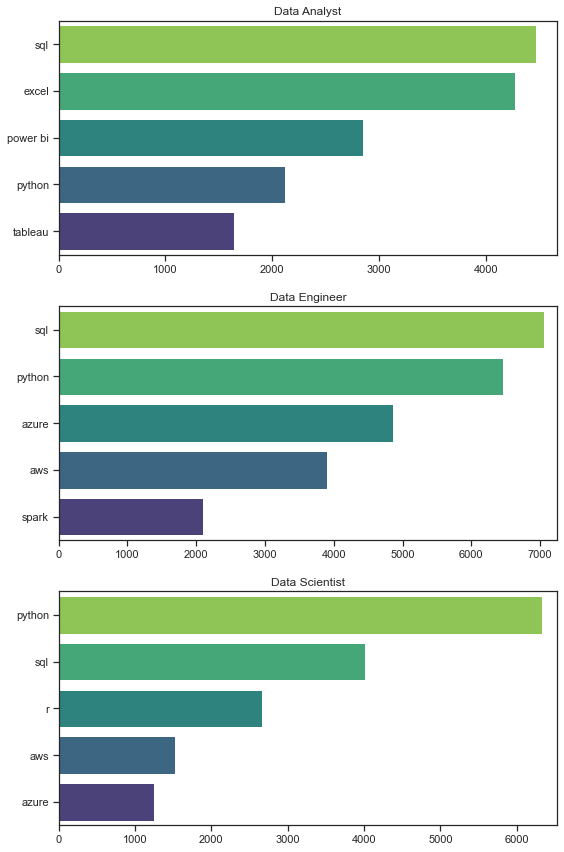

In [74]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, len(job_titles) * 4))

sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)[::-1]
    sns.barplot(data=df_plot, x='skill_count', y='job_skills', ax=ax[i], palette='viridis')
    ax[i].set_title(job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
 
    ax[i].set_xlim(0, df_plot['skill_count'].max() + 200)  # Adjust xlim dynamically based on data

fig.tight_layout(h_pad=1.5)  # Increase h_pad to avoid overlap
plt.show()

Convert Counts to Percentages

Focus: Counts don't show what portions of jobs are requesting these skills
So we'll convert the counts into percentages which helps us understand how each job title represents relative to the entire dataset.

Before we can calculate the percentages we need the total counts for the jobs posted by job title. Calculate the frequency of each job title using the value_counts() method on the job_title_short column. Then reset the index to transform the Series into a DataFrame and renames the columns to job_title_short and total. The DataFrame df_job_title_count now holds a list of job titles alongside their total occurrences.

In [96]:
# Use original df to get the count of job titles
df_job_title_count = df_UK['job_title_short'].value_counts().reset_index(name='jobs_total').rename(columns={'index': 'job_title_short'})

print(df_job_title_count)

             job_title_short  jobs_total
0              Data Engineer       11807
1               Data Analyst       10482
2             Data Scientist        9148
3       Senior Data Engineer        3337
4      Senior Data Scientist        2367
5        Senior Data Analyst        1356
6           Business Analyst         827
7          Software Engineer         541
8  Machine Learning Engineer         317
9             Cloud Engineer         193


Then we calculate the percentages.

First merge df_skills_count and df_job_title_count, based on the 'job_title_short' column, ensuring each skill count is associated with the total number of job postings for that title. Then calculate the percentage of each skill within its job title by dividing the skill count by the total job postings and multiplying by 100, adding this new data as a 'percentage' column.

In [97]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, on='job_title_short', how='left')

df_skills_perc['skill_percent'] = (df_skills_perc['skill_count'] / df_skills_perc['jobs_total']) * 100

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,7050,11807,59.710341
1,python,Data Engineer,6462,11807,54.730245
2,python,Data Scientist,6329,9148,69.184521
3,azure,Data Engineer,4865,11807,41.204370
4,sql,Data Analyst,4467,10482,42.615913
...,...,...,...,...,...
1414,openstack,Software Engineer,1,541,0.184843
1415,opencv,Software Engineer,1,541,0.184843
1416,opencv,Machine Learning Engineer,1,317,0.315457
1417,objective-c,Data Analyst,1,10482,0.009540


Plot Percentage Count

Filters and sorts a DataFrame to get the top 5 skills percentages for these top 3 roles. After sorting the skills by descending percentage, reverse the order of these top 5 entries to use in a horizontal bar plot, which by default starts plotting from the bottom.

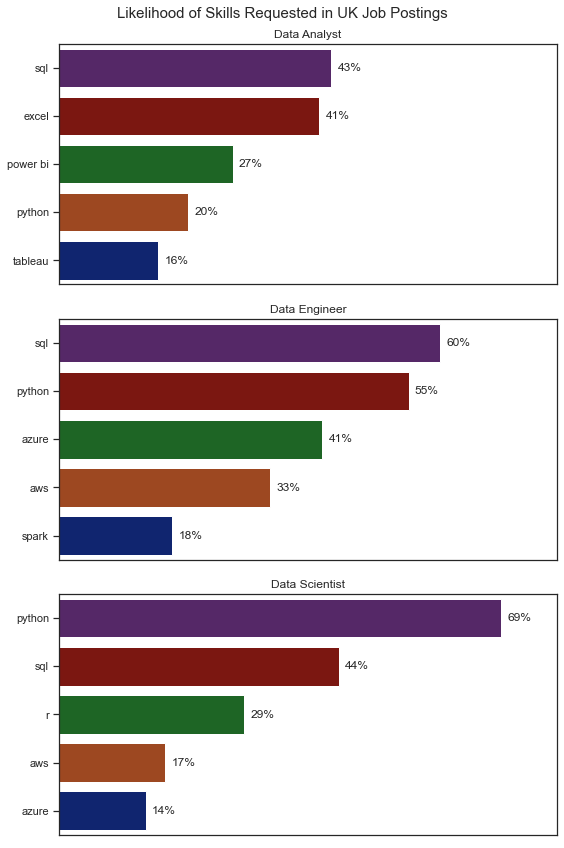

In [100]:
fig, ax = plt.subplots(len(job_titles), 1, figsize=(8, len(job_titles) * 4))

# Plotting loop
for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark', dodge=False)
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)  # Adjust xlim dynamically based on your data
    ax[i].set_xticks([])  # Remove x-axis ticks

    # Label the percentage on the bars
    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

fig.suptitle('Likelihood of Skills Requested in UK Job Postings', fontsize=15)
fig.tight_layout(h_pad=1.2)  # Increase h_pad for better spacing between subplots
plt.show()

Insights:

- SQL is the most requested skill for Data Analysts and Data Engineers, with it in over half the job postings for both roles. For Data Scientist, Python is the most sought-after skill, appearing in 69% of job postings.

- Data Engineers require more specialized technical skills (Azure,AWS, Spark) compared to Data Analysts and Data Scientists who are expected to be proficient in more general data management and analysis tools (Excel, Power BI).

- Python is a versatile skill, highly demanded across all three roles, but most prominently for Data Scientists (69%) and Data Engineers (55%).

2. How are in-demand skills trending for Data Analysts?


In [101]:
## Skill count per month for data analysts
df_DA_UK = df[(df['job_title'] == 'Data Analyst') & (df['job_country'] == 'United Kingdom')].copy()

df_DA_UK['job_posted_month_no'] = df_DA_UK['job_posted_date'].dt.month

# Explode job_skills column
df_DA_UK_explode = df_DA_UK.explode('job_skills')

In [102]:
# Group by month and job_skills
df_DA_UK_pivot = df_DA_UK_explode.pivot_table(index='job_posted_month_no', columns='job_skills',  aggfunc='size', fill_value=0)

df_DA_UK_pivot

job_skills,airflow,airtable,alteryx,asana,assembly,atlassian,aurora,aws,azure,bash,...,unreal,vba,visio,visual basic,vmware,watson,windows,wire,word,zoom
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,1,0,8,0,0,1,0,10,26,1,...,0,16,9,3,0,0,2,0,28,0
2,0,0,7,0,0,0,0,8,28,2,...,0,7,2,0,2,0,4,0,16,0
3,0,0,2,0,0,0,0,7,13,0,...,0,10,0,1,0,0,2,0,10,1
4,1,0,2,0,0,0,0,7,9,0,...,0,5,0,1,0,0,3,0,10,0
5,2,0,3,0,0,1,0,8,16,0,...,0,7,3,0,0,0,0,0,8,0
6,1,0,1,0,1,0,1,15,19,0,...,0,9,2,0,0,0,1,0,12,0
7,2,0,1,0,0,0,0,13,31,0,...,0,9,0,1,2,0,3,0,16,0
8,0,0,0,0,0,0,0,9,17,0,...,0,7,0,1,1,0,4,1,11,0
9,2,0,4,1,0,0,1,17,24,0,...,0,25,0,5,1,1,1,0,13,1


In [103]:
# sorts by count
df_DA_UK_pivot.loc['Total'] = df_DA_UK_pivot.sum()
df_DA_UK_pivot = df_DA_UK_pivot[df_DA_UK_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_UK_pivot = df_DA_UK_pivot.drop('Total')

df_DA_UK_pivot

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,monday.com,unreal,dart,node,terraform,drupal,elasticsearch,pytorch,graphql,airtable
job_posted_month_no,,,,,,,,,,,,,,,,,,,,,
1,255,226,157,95,91,50,74,26,15,32,...,0,0,0,1,0,0,0,0,0,0
2,182,162,92,61,57,37,38,28,14,16,...,0,0,0,0,0,0,0,0,0,0
3,119,105,71,47,50,31,14,13,18,11,...,0,0,0,0,0,0,0,0,0,0
4,84,78,46,40,28,17,24,9,11,7,...,0,0,0,0,0,0,0,0,0,0
5,114,84,59,30,29,18,8,16,12,9,...,0,0,0,0,0,0,0,0,0,0
6,102,95,79,36,37,17,8,19,12,17,...,0,0,0,0,0,0,0,0,0,0
7,131,113,97,52,42,29,34,31,14,18,...,0,0,0,0,0,1,0,0,0,0
8,109,78,64,39,39,16,10,17,13,7,...,0,0,0,0,0,0,0,0,0,0
9,211,167,130,99,87,58,24,24,15,11,...,0,0,1,0,0,0,1,0,0,0


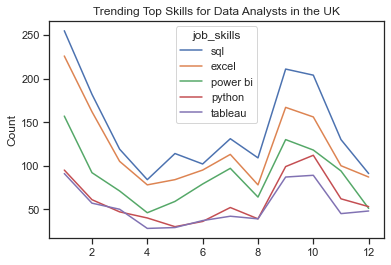

In [106]:
df_DA_UK_pivot.iloc[:, :5].plot(kind='line')

plt.title('Trending Top Skills for Data Analysts in the UK')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

In [108]:
# Get monthly totals
DA_totals = df_DA_UK.groupby('job_posted_month_no').size()

DA_totals

job_posted_month_no
1     519
2     355
3     237
4     175
5     202
6     215
7     253
8     212
9     369
10    369
11    266
12    205
dtype: int64

In [110]:
# divide first 12 rows of df_DA_pivot by DA_totals
df_DA_UK_percent = df_DA_UK_pivot.iloc[:12].div(DA_totals/100, axis=0)

# changes month number to month name
df_DA_UK_percent = df_DA_UK_percent.reset_index()
df_DA_UK_percent['job_posted_month'] = df_DA_UK_percent['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format='%m').strftime('%b'))
df_DA_UK_percent = df_DA_UK_percent.set_index('job_posted_month')
df_DA_UK_percent = df_DA_UK_percent.drop(columns='job_posted_month_no')

df_DA_UK_percent

job_skills,sql,excel,power bi,python,tableau,r,sas,azure,go,powerpoint,...,monday.com,unreal,dart,node,terraform,drupal,elasticsearch,pytorch,graphql,airtable
job_posted_month,,,,,,,,,,,,,,,,,,,,,
Jan,49.132948,43.545279,30.250482,18.304432,17.533719,9.633911,14.258189,5.009634,2.890173,6.165703,...,0.000000,0.000000,0.000000,0.192678,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Feb,51.267606,45.633803,25.915493,17.183099,16.056338,10.422535,10.704225,7.887324,3.943662,4.507042,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Mar,50.210970,44.303797,29.957806,19.831224,21.097046,13.080169,5.907173,5.485232,7.594937,4.641350,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Apr,48.000000,44.571429,26.285714,22.857143,16.000000,9.714286,13.714286,5.142857,6.285714,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
May,56.435644,41.584158,29.207921,14.851485,14.356436,8.910891,3.960396,7.920792,5.940594,4.455446,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jun,47.441860,44.186047,36.744186,16.744186,17.209302,7.906977,3.720930,8.837209,5.581395,7.906977,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Jul,51.778656,44.664032,38.339921,20.553360,16.600791,11.462451,13.438735,12.252964,5.533597,7.114625,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.395257,0.000000,0.000000,0.000000,0.000000
Aug,51.415094,36.792453,30.188679,18.396226,18.396226,7.547170,4.716981,8.018868,6.132075,3.301887,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Sep,57.181572,45.257453,35.230352,26.829268,23.577236,15.718157,6.504065,6.504065,4.065041,2.981030,...,0.000000,0.000000,0.271003,0.000000,0.000000,0.000000,0.271003,0.000000,0.000000,0.000000


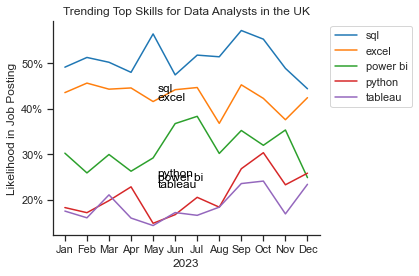

In [117]:
# Plotting
df_plot = df_DA_UK_percent.iloc[:, :5]
sns.lineplot(data=df_plot, dashes=False, palette='tab10')
sns.set_theme(style='ticks')
sns.despine()

plt.title('Trending Top Skills for Data Analysts in the UK')
plt.ylabel('Likelihood in Job Posting')
plt.xlabel('2023')
plt.gca().yaxis.set_major_formatter(PercentFormatter(decimals=0))

# Annotate the plot with the top 5 skills using plt.text()
for i in range(5):
    last_value = df_plot.iloc[-1, i]  # Get the last value for current skill
    plt.text(4.2, last_value, df_plot.columns[i], color='black', va='center', ha='left')

# Remove the default legend and create a custom legend outside the plot area
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1.02, 1))

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

C:\Users\Tati\AppData\Local\Temp/ipykernel_51504/2632296331.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UK['job_posted_date'] = pd.to_datetime(df_UK['job_posted_date'])  # Convert to datetime if not already
C:\Users\Tati\AppData\Local\Temp/ipykernel_51504/2632296331.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_UK['month_year'] = df_UK['job_posted_date'].dt.to_period('M')


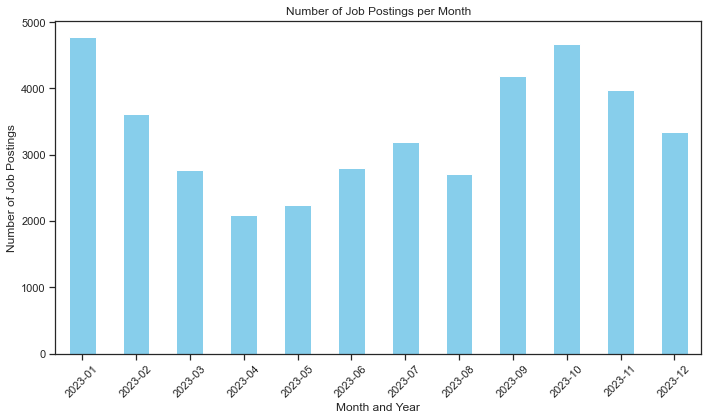

In [123]:

df_UK['job_posted_date'] = pd.to_datetime(df_UK['job_posted_date'])  # Convert to datetime if not already

# Extract month and year from job_posted_date
df_UK['month_year'] = df_UK['job_posted_date'].dt.to_period('M')

# Count number of job postings per month
job_postings_per_month = df_UK['month_year'].value_counts().sort_index()

# Plotting
plt.figure(figsize=(10, 6))
job_postings_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Job Postings per Month')
plt.xlabel('Month and Year')
plt.ylabel('Number of Job Postings')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Highest Paid & Most Demanded Skills for Data Analysts

Next, I narrowed my analysis and focused only on data analyst roles. I looked at the highest-paid skills and the most in-demand skills. I used two bar charts to showcase these.

In [125]:
# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_UK = df_DA_UK.dropna(subset=['salary_year_avg'])

df_DA_UK_exploded = df_DA_UK.explode('job_skills')

df_DA_UK_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
25994,105000.0,go
25994,105000.0,gdpr
25994,105000.0,dax
84680,105000.0,sql
98784,100500.0,sql


In [126]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_UK_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_UK)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,10,99500.00,62.50
excel,5,100500.00,31.25
python,4,65015.75,25.00
tableau,4,99500.00,25.00
sas,2,51014.00,12.50
aws,1,165000.00,6.25
terminal,1,53014.00,6.25
ssrs,1,98500.00,6.25
sql server,1,98500.00,6.25


In [127]:

skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

In [172]:
!pip install adjustText





               In some cases adjust_text might fail, if possible update
               matplotlib to version >=3.5.0


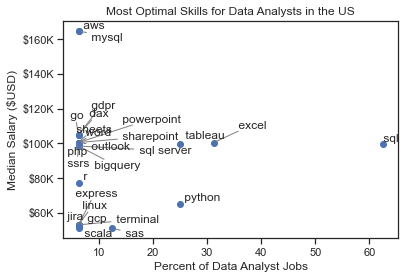

In [176]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the UK')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()